### Problem Statement

In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.medium_test()

### Exact solutions

[Qibo 0.2.7|INFO|2024-05-27 12:40:47]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-05-27 12:40:47]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-27 12:40:47]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Best feasible profit: 207
Minimum energy: -272.926
Minimum energy without offset: -585.8504999999996
s = 0 : [(-4.000000000000003+0j), (-2.0000000000000004+0j)]
s = 1 : [(-3.6069091958171957+0j), (-1.9076842465510186+0j)]
s = 2 : [(-3.2287161112576603+0j), (-1.8178379199256272+0j)]
s = 3 : [(-2.8674454438647508+0j), (-1.7310916149083875+0j)]
s = 4 : [(-2.5259651002482686+0j), (-1.6482439197873455+0j)]
s = 5 : [(-2.2087233015074004+0j), (-1.5701329589770696+0j)]
s = 6 : [(-1.9237392511136333+0j), (-1.496817856956243+0j)]
s = 7 : [(-1.689319475128275+0j), (-1.4236815410735324+0j)]
s = 8 : [(-1.5469253545084924+0j), (-1.338055669433589+0j)]
s = 9 : [(-1.5193233628116198+0j), (-1.2932149633438825+0j)]
s = 10 : [(-1.6097270459191522+0j), (-1.3778094981645534+0j)]


c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


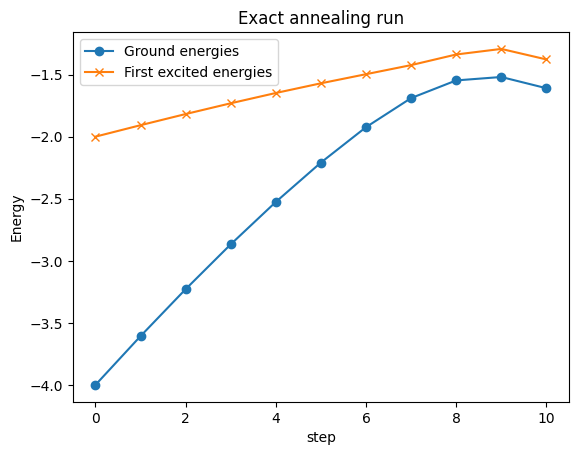

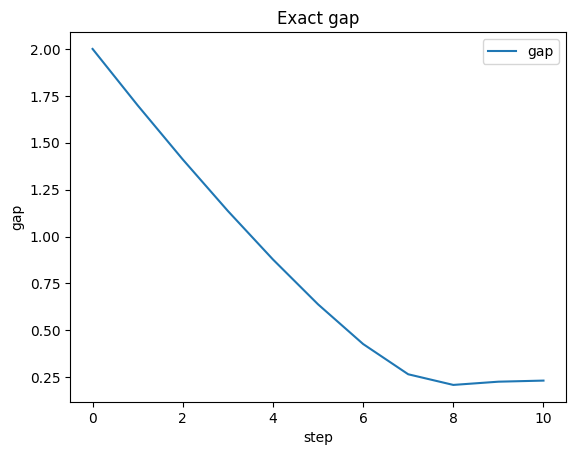

estimated minimum gap:  (0.20886968507490344+0j)


In [2]:
from exact_solver import Exact_solver

exact_solver = Exact_solver(W_capacity, weights, values)

best_feasible_profit, minimum_energy = exact_solver.run()

print(f'Best feasible profit: {best_feasible_profit}')
print(f'Minimum energy: {minimum_energy}')
print(f'Minimum energy without offset: {minimum_energy - exact_solver.offset}')


exact_solver.annealing_run(10)

### DP

In [3]:
from dp_solver import DP_solver

dp_solver = DP_solver(W_capacity, weights, values)
items_in_solution = dp_solver.run()
dp_solver.show_solution()

-------- Solution has items:  [0, 3] --------
 - Evaluating candidate  [0, 3]
Profit: 207
Weight: 81 (satisfies constraint W=114)
Energy: -163.44
-------------------------------------------------


### Simulated annealing

In [4]:
from neal_solver import Neal_annealing_solver

H_solver = Neal_annealing_solver(W_capacity, weights, values)
neal_solution_items = H_solver.run()
H_solver.show_solution()

# H_solver.energy_of_items(items_in_solution)


-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------


[Qibo 0.2.7|WARNING|2024-05-27 12:40:47]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-27 12:40:47]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [0, 2, 3]
fins aqui
Target energy -1.6097270459191522
+ offset (312.9244999999996) = 311.31477295408047
final annealing energy:  -1.4782649496434361
-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------


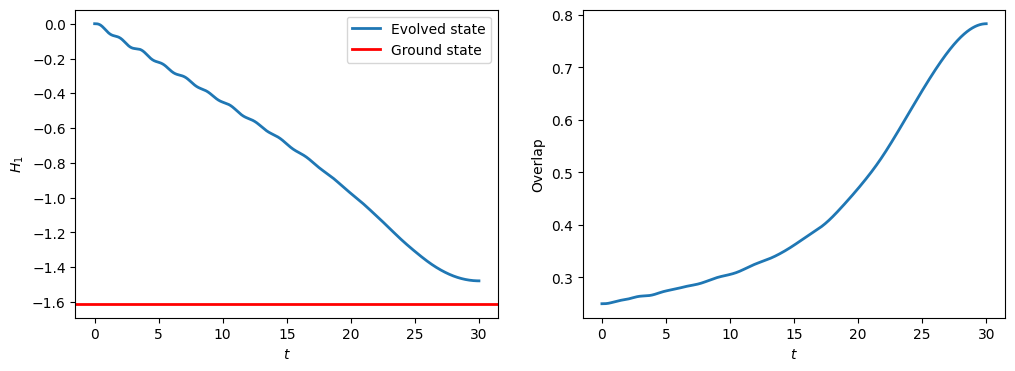

In [5]:
from qibo_solver import Qibo_annealing_solver

Qibo_solver = Qibo_annealing_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
h1 = Qibo_solver.get_ham()
print('fins aqui')

T = 30 # Total time of the adiabatic evolution.
Qibo_solver.run(T)
Qibo_solver.show_solution()

### DMRG

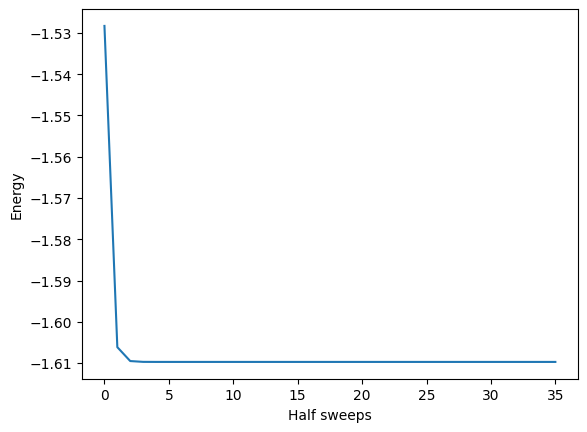

Solution energy = -1.6097270459191522 + 312.9244999999996 (offset) = 311.31477295408047
-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------
 **** Neal solution:  [0, 2, 3] ****

 Neal solution:
 - Evaluating candidate  1011
Energy: -1.6097270459191522
+ offset (312.9244999999996) = 311.31477295408047


In [6]:
from dmrg_solver import DMRG_solver

chi = 32
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)

numsweeps = 6 # number of DMRG sweeps
qkp_DMRG.run(numsweeps)

qkp_DMRG.show_solution()

print(' **** Neal solution: ', neal_solution_items, '****')

def convert_to_string(lst, N):
    result = ['0'] * (N)
    for i in lst:
        result[i] = '1'
    return ''.join(result)

print('\n Neal solution:')
qkp_DMRG.energy_of_items(convert_to_string(neal_solution_items, qkp_DMRG.N))


 ---- s= 0  ----
Solution energy = -3.9999999999999982 + 312.9244999999996 (offset) = 308.9244999999996
DMRG gap: [-3.9999999999999982, -3.5253566250709927]
Real gap:  [-4.0, -2.000000000000003]
 ---- s= 1  ----
Solution energy = -3.6069091958171997 + 312.9244999999996 (offset) = 309.31759080418243
DMRG gap: [-3.6069091958171997, -3.5617567403498818]
Real gap:  [-3.606909195817196, -1.9076842465510222]
 ---- s= 2  ----
Solution energy = -3.2287161112576697 + 312.9244999999996 (offset) = 309.69578388874197
DMRG gap: [-3.2287161112576697, -3.09540728669552]
Real gap:  [-3.228716111257671, -1.81783791992563]
 ---- s= 3  ----
Solution energy = -2.867445443864775 + 312.9244999999996 (offset) = 310.05705455613486
DMRG gap: [-2.867445443864775, -2.8043321587815044]
Real gap:  [-2.8674454438647516, -1.7310916149083844]
 ---- s= 4  ----
Solution energy = -2.5259651002482717 + 312.9244999999996 (offset) = 310.3985348997513
DMRG gap: [-2.5259651002482717, -1.7708602491181793]
Real gap:  [-2.52596

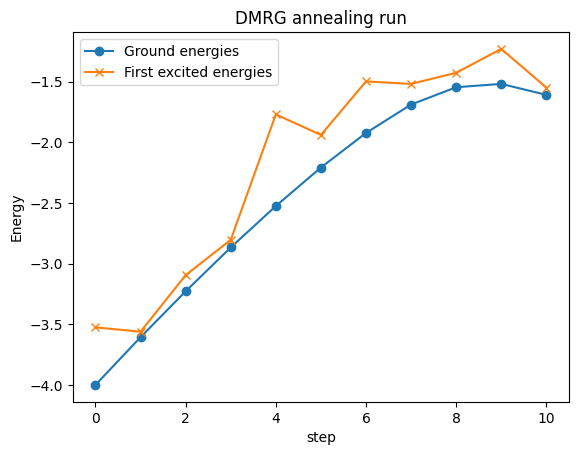

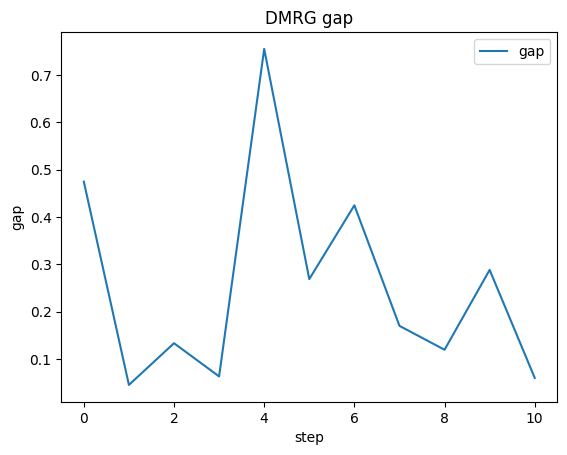

In [7]:
qkp_DMRG.annealing_run()